# Vilnius Appartments
## By Svajune Klimasauskaite

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt
#from google.cloud import storage

%matplotlib inline

## Load Data



In [30]:
#Load flats
flat=pd.read_csv("https://raw.githubusercontent.com/vilnius/apartment-buildings/master/apartment_buildings_2019.csv", sep=';')
flat.head(2)

,id,adresas,namo_valdytojas,valdymo_forma,paskyrimo_pagrindas,administratoriaus_pabaigos_Data,paskirtis,uni_nr,bendr_plotas,naud_plotas,build_year,renov_metai,renovacijos_statusas,energ_naudingumo_klase,butu_skaicius,negyvenamuju_palapu_skaicius,korpusas,sklypo_plotas
0,1,A. Goštauto g. 2,286-oji gyvenamojo namo A.Goštauto g. 2/15 sav...,Bendrija,1995.02.02,NaN,Gyvenamoji (trys ir daugiau butų),1096-0010-4010,6607.43,4360.68,1960.0,NaN,Nerenovuotas,NaN,53.0,4.0,1A7p,0.00
1,2,A. Goštauto g. 3,DNSB NERIES VINGIS,Bendrija,2009.04.10,NaN,Gyvenamoji (trys ir daugiau butų),1095-7003-6016,4304.17,2771.57,1957.0,NaN,Nerenovuotas,NaN,38.0,14.0,1A5p,0.15


In [31]:
# Get rid of unnecessary columns
flat.drop(columns = ['namo_valdytojas', 'valdymo_forma', 'paskyrimo_pagrindas',
                    'administratoriaus_pabaigos_Data', 'uni_nr', 'korpusas'], inplace = True)

# Translate column names to english  
flat.rename(columns={'adresas':'street', 'paskirtis':'purpose',
                        'bendr_plotas':'area', 'naud_plotas':'area_useful',
                       'build_year':'year', 'renov_metai':'year_renov', 'renovacijos_statusas':'renov_status',
                       'energ_naudingumo_klase':'efficiency', 'butu_skaicius':'no_flats',
                       'negyvenamuju_palapu_skaicius':'not_living_flats','sklypo_plotas':'land',
                       }, inplace=True)
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
2338,2339,Žirmūnų g. 17,Gyvenamoji (trys ir daugiau butų),0.00,4422.90,1965.0,2014.0,Renovuotas,C,100.0,0.0,0.0
4473,4475,Vokiečių g. 5,Gyvenamoji (trys ir daugiau butų),3050.83,2007.57,1940.0,NaN,Nerenovuotas,NaN,30.0,5.0,0.0
908,909,Gabijos g. 51,Gyvenamoji (trys ir daugiau butų),0.00,0.00,1987.0,NaN,Nerenovuotas,NaN,56.0,0.0,0.0
3481,3483,Gabijos g. 49,Gyvenamoji (trys ir daugiau butų),3444.29,2783.63,1987.0,NaN,Nerenovuotas,NaN,48.0,0.0,0.0
225,226,Kaštonų g. 5,Gyvenamoji (trys ir daugiau butų),1373.48,1206.65,1940.0,NaN,Nerenovuotas,NaN,14.0,2.0,0.0


## Data Check

In [32]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6521 entries, 0 to 6520
Data columns (total 12 columns):
id                  6521 non-null int64
street              6521 non-null object
purpose             6518 non-null object
area                6519 non-null float64
area_useful         6519 non-null float64
year                6510 non-null float64
year_renov          289 non-null float64
renov_status        6466 non-null object
efficiency          1291 non-null object
no_flats            6519 non-null float64
not_living_flats    6510 non-null float64
land                6513 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 611.4+ KB


In [ ]:
flat.dtypes

In [65]:
# Count null records
flat.isnull().sum()

id                     0
street                 0
purpose                3
area                   2
area_useful            2
year                   0
year_renov             0
renov_status          55
efficiency          5230
no_flats               2
not_living_flats      11
land                   8
dtype: int64

In [ ]:
# Count unique records
flat.nunique()

In [ ]:
flat.sample(5)

## Data Cleaning and Augmentation

### Split Street and House info

In [69]:
flat['house'] = flat['street'].str[::-1].str.split('.').str[0].str[::-1]
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land,house
2802,2804,P. Žadeikos g. 12,Gyvenamoji (trys ir daugiau butų),4193.62,3507.02,1989,0,Nerenovuotas,NaN,50.0,0.0,0.0,12
2426,2427,Kubiliaus g. 4B,Gyvenamoji (trys ir daugiau butų),4879.45,3010.84,2007,0,Nerenovuotas,C,50.0,61.0,0.0,4B
3921,3923,Santariškių g. 69,Gyvenamoji (trys ir daugiau butų),1274.28,1274.28,2009,0,Nerenovuotas,C,24.0,0.0,0.0,69
5002,5004,Žirmūnų g. 39,Gyvenamoji (trys ir daugiau butų),3240.80,2707.50,1965,0,Nerenovuotas,NaN,60.0,0.0,0.0,39
612,613,A. Paškevič-Ciotkos g. 21,Gyvenamoji (trys ir daugiau butų),1450.73,1173.43,1989,0,Nerenovuotas,NaN,22.0,0.0,0.0,21


In [71]:
flat['house'].unique()

array([' 2', ' 3', ' 11', ' 6A', ' 10', ' 28', ' 45', ' 92', ' 32', ' 15',
       ' 20', ' 4A', ' 5', ' 1', ' 4', ' 14', ' 16', ' 27', ' 35', ' 53',
       ' 30', ' 50', ' 58', ' 62', ' 68', ' 69', ' 83', ' 84', ' 85',
       ' 89', ' 90', ' 95', ' 96', ' 97', ' 105', ' 132', ' 168', ' 176',
       ' 180', ' 194', ' 196', ' 200', ' 212', ' 220', ' 51', ' 64',
       ' 67', ' 91', ' 7', ' 77', ' 7C', ' 19', ' 9', ' 73', ' 21', ' 8',
       ' 2A', ' 31', ' 6', ' 39', ' 72', ' 78', ' 42', ' 13', ' 58B',
       ' 33', ' 12', ' 3B', ' 75', ' 46', ' 48', ' 25', ' 23', ' 52',
       ' 54', ' 60', ' 24', ' 57', ' 59', ' 55', ' 17', ' 7A', ' 49',
       ' 61', ' 63', ' 71', ' 18', ' 2B', ' 11A', ' 126', ' 138', ' 144',
       ' 150', ' 276A', ' 29', ' 290', ' 294A', ' 29A', ' 43', ' 70',
       ' 98', ' 37A', ' 100', ' 36', ' 37, Grigiškės', ' 49, Grigiškės',
       ' 53A', ' 8A', ' 115A', ' 117', ' 123', ' 79D', ' 87B', ' 99A',
       ' 64A', ' 133', ' 38', ' 15A', ' 84A', ' 3A', ' 81', ' 14B'

In [ ]:
flat['namo_nr'] = flat['adresas'].str.split('.')[-1]
# Code. Remove the link and reverse the string. 
rating = t_merge['text'].str.split('https:').str[0].str[::-1]
# Grap the first pattern 
rating = rating.str.extract('(\d+)/(\d+)')
# Store nto the rating format and do a back reverse
full_rating = (rating[0]+'/'+rating[1])
full_rating = full_rating.str[::-1]

### Flat Purpose

In [60]:
flat.purpose.unique()

array(['Gyvenamoji (trys ir daugiau butų)',
       'Gyvenamoji (įvairioms socialinėms grupėms)',
       'Gyvenamoji (vieno buto pastatai)', 'Prekybos\r\n',
       'Administracinė', 'Gyvenamoji (dviejų butų pastatas)',
       'Nenustatyta', 'Viešbučių', 'Sudegęs', 'Bendrabutis',
       'Gyvenamasis su visuomeninėmis patalpomis',
       'Prekybinis - administracinis pastatas su gyvenamomis patalpomis',
       'Daugiabutis gyvenamas namas/komercinė',
       'Gyvenamasis komercinis kompleksas', 'Dvibutis', nan], dtype=object)

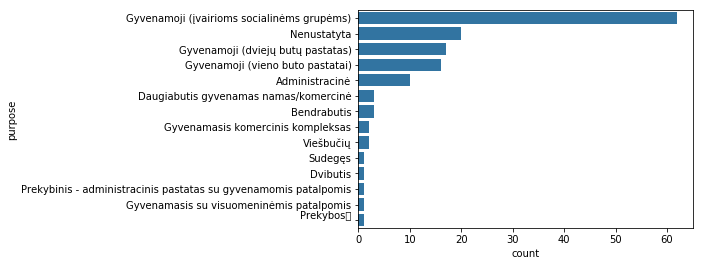

In [62]:
base_color=sb.color_palette()[0]
flat2 = flat[flat['purpose'] != 'Gyvenamoji (trys ir daugiau butų)']
order_rule=flat2['purpose'].value_counts().index
sb.countplot(data=flat2, y='purpose', color=base_color, order=order_rule);

### Year

In [33]:
flat['year'].unique()

array([1960., 1957., 1940., 1938., 2006., 1955., 1959., 1953., 1972.,
       1996., 1995., 1994., 2008., 1901., 1961., 1958., 1974., 1968.,
       1975., 1963., 1964., 2001., 2002., 1967., 1966., 2007., 1970.,
       1971., 1969., 1980., 1984., 1986., 1985., 1981., 2013., 1997.,
       2009., 2000., 1993., 1989., 1982., 1977., 1983., 1965., 2004.,
       1973., 1979., 1952., 2012., 2015., 1987., 2003.,    0., 1962.,
       2005., 1976., 1978., 1998., 1923., 1999., 1944., 1950., 1990.,
       1988., 1991., 1954., 1903., 2014., 1951., 1992., 1956., 1912.,
       1934., 2010., 1935., 2016., 1937., 1911., 1933., 1930., 1928.,
       2011., 2017., 1931., 1932., 1916., 1947., 1939., 1936., 1913.,
       1948., 1922., 1910., 1946., 1929., 1914., 1941., 1905., 1942.,
       1920., 1949., 1924., 1927., 1915., 1908., 1926.,   nan])

In [34]:
flat['year'] = flat['year'].replace(np.nan, '0').replace('0.0', '0').astype(int)
flat['year'].unique()

array([1960, 1957, 1940, 1938, 2006, 1955, 1959, 1953, 1972, 1996, 1995,
       1994, 2008, 1901, 1961, 1958, 1974, 1968, 1975, 1963, 1964, 2001,
       2002, 1967, 1966, 2007, 1970, 1971, 1969, 1980, 1984, 1986, 1985,
       1981, 2013, 1997, 2009, 2000, 1993, 1989, 1982, 1977, 1983, 1965,
       2004, 1973, 1979, 1952, 2012, 2015, 1987, 2003,    0, 1962, 2005,
       1976, 1978, 1998, 1923, 1999, 1944, 1950, 1990, 1988, 1991, 1954,
       1903, 2014, 1951, 1992, 1956, 1912, 1934, 2010, 1935, 2016, 1937,
       1911, 1933, 1930, 1928, 2011, 2017, 1931, 1932, 1916, 1947, 1939,
       1936, 1913, 1948, 1922, 1910, 1946, 1929, 1914, 1941, 1905, 1942,
       1920, 1949, 1924, 1927, 1915, 1908, 1926])

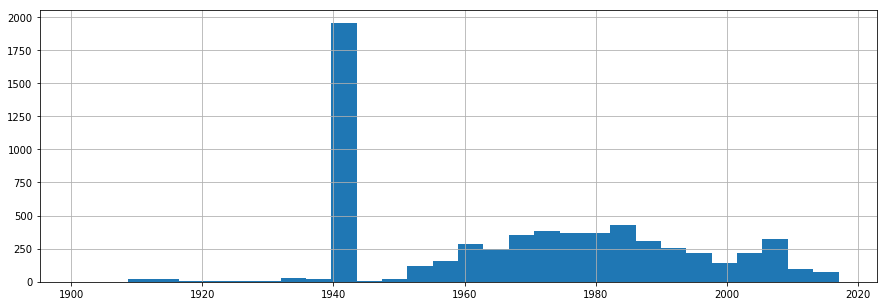

In [35]:
plt.figure(figsize = [15, 5]) 
flat[flat['year'] != 0]['year'].hist(bins=30);

### Renovation Year

In [36]:
flat['year_renov'].unique()

array([  nan, 2017., 2016., 2007., 2006., 2010., 2008., 2009., 2015.,
       2005., 2000., 2011., 2014., 2013.])

In [37]:
flat['year_renov'] = flat['year_renov'].replace(np.nan, '0').replace('0.0', '0').astype(int)
flat['year_renov'].unique()

array([   0, 2017, 2016, 2007, 2006, 2010, 2008, 2009, 2015, 2005, 2000,
       2011, 2014, 2013])

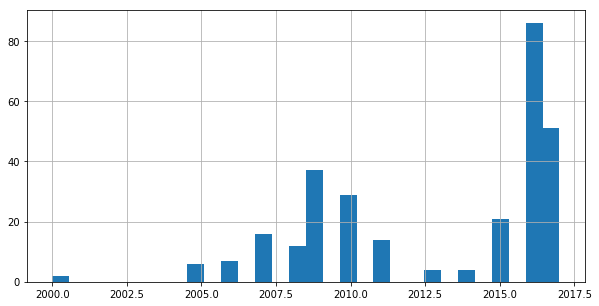

In [68]:
plt.figure(figsize = [10, 5]) 
flat[flat['year_renov'] != 0]['year_renov'].hist(bins = 30);

### Renovation Status

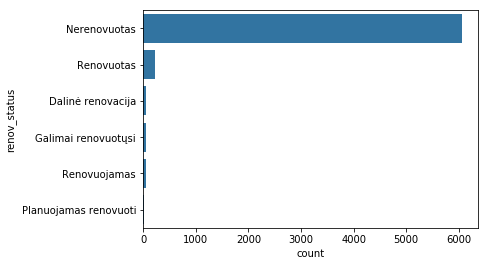

In [39]:
base_color=sb.color_palette()[0]
order_rule=flat['renov_status'].value_counts().index
sb.countplot(data=flat, y='renov_status', color=base_color, order=order_rule);

In [45]:
flat['renov_status'].isnull().sum()

55

### House Efficiency

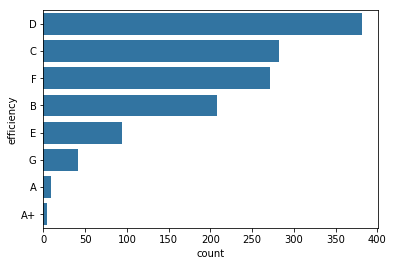

In [40]:
base_color=sb.color_palette()[0]
order_rule=flat['efficiency'].value_counts().index
sb.countplot(data=flat, y='efficiency', color=base_color, order=order_rule);

In [44]:
flat['efficiency'].isnull().sum()

5230

### Number of Flats in the Building

In [64]:
print('Number of records without information: {}'.format(flat['no_flats'].isnull().sum()))
print('Total number of appartments: {}'.format(flat['no_flats'].sum()))

Number of records without information: 2
Total number of appartments: 214450.0


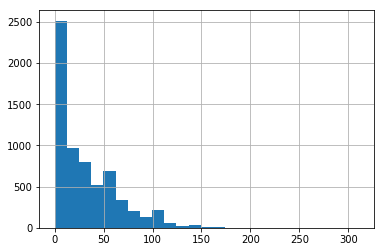

In [49]:
flat['no_flats'].hist(bins = 25);

### Number of Not Occupied Flats

In [50]:
flat['not_living_flats'].isnull().sum()

11

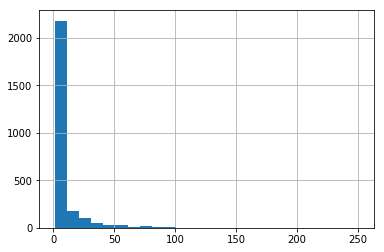

In [55]:
flat[flat['not_living_flats'] != 0]['not_living_flats'].hist(bins = 25);

### Land

In [58]:
flat['land'].describe()

count     6513.000000
mean        96.933915
std       1940.635516
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      39190.000000
Name: land, dtype: float64

## Save the File

In [ ]:
#df.to_csv(neigh, '⁨Google Drive⁩/My Drive⁩/Vilniaus duomenys⁩/Vilnius.csv', sep=';')